In [19]:
from gensim import models, similarities
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dictionary = pickle.load(open('dictionary-2.p', "rb"))
tokenized_lyrics = pickle.load(open('tokenized-lyrics-2.p', "rb"))
document_song_mapping = pickle.load(open('doc-song-mapping-2.p', "rb"))
token_song_mapping = pickle.load(open('token-song-mapping-2.p', "rb"))
corpus	=	[dictionary.doc2bow(doc)	for	doc	in	tokenized_lyrics]
mydict = dictionary.token2id
inverted_dict = dict([[v,k] for k,v in mydict.items()])

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=5)
dirt_bow = corpus[5]
dirt_lda = lda[dirt_bow]

angrychair_bow = corpus[5]
angrychair_lda = lda[angrychair_bow]

corpus_lda = lda[corpus]

index = similarities.MatrixSimilarity(corpus_lda)
sims = index[dirt_lda]
for doc_id, sim in enumerate(sims):
    print doc_id, document_song_mapping[doc_id], sim
sims = sorted(enumerate(sims), key=lambda item: -item[1])
#sims = sims[:15]
sim_values = []
for doc_id, sim in sims:
    print doc_id, document_song_mapping[doc_id], sim
    sim_values.append(sim)
#lda.print_topics(5)

0 ('linkin park', 'Breaking the Habit') 0.0
1 ('linkin park', 'Papercut') 1.0
2 ('linkin park', 'Somewhere I Belong') 0.0
3 ('linkin park', 'Invisible') 0.0
4 ('linkin park', 'Leave Out All the Rest') 0.0
5 ('linkin park', "What I've Done") 1.0
6 ('linkin park', 'Faint') 0.223723
7 ('linkin park', 'CASTLE OF GLASS') 0.0
8 ('linkin park', 'Bleed It Out') 0.0
9 ('linkin park', 'Sorry for Now') 0.108938
10 ('evanescence', 'Haunted') 0.0
11 ('evanescence', 'My Heart Is Broken') 0.0
12 ('evanescence', 'Lost in Paradise') 0.0
13 ('evanescence', 'My Last Breath') 0.0
14 ('evanescence', 'My Immortal (Band Version)') 0.0
15 ('evanescence', 'Sweet Sacrifice') 0.0
16 ('evanescence', 'Imaginary') 0.0
17 ('evanescence', 'Taking Over Me') 0.631553
18 ('evanescence', 'Breathe No More') 0.0
19 ('alice in chains', 'Got Me Wrong') 0.0
20 ('alice in chains', 'Dirt') 0.0
21 ('alice in chains', 'Heaven Beside You') 0.0
22 ('alice in chains', "Don't Follow") 0.0
23 ('alice in chains', 'God Am') 0.0
24 ('ali

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99960476, 0.99895346, 0.99728948, 0.98706907, 0.97993994, 0.97955573, 0.94942856, 0.89658761, 0.88713783, 0.79902214, 0.79365021, 0.63155347, 0.62534815, 0.45361352, 0.34160829, 0.22844668, 0.22372265, 0.13562158, 0.10893774, 0.01983542, 0.011721866, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

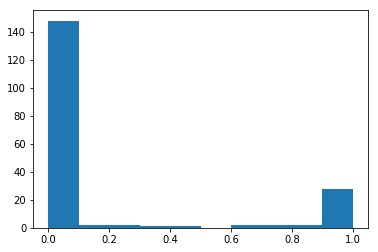

In [20]:
print sim_values
#positions = np.arange(len(sim_values))
plt.hist(sim_values)
plt.show()

In [23]:
# print those songs whose similarity to this song > 0.9
i=0
for sim in sim_values:
    if sim > 0.9:
        print document_song_mapping[i], sim
        i+=1

('linkin park', 'Breaking the Habit') 1.0
('linkin park', 'Papercut') 1.0
('linkin park', 'Somewhere I Belong') 1.0
('linkin park', 'Invisible') 1.0
('linkin park', 'Leave Out All the Rest') 1.0
('linkin park', "What I've Done") 1.0
('linkin park', 'Faint') 1.0
('linkin park', 'CASTLE OF GLASS') 1.0
('linkin park', 'Bleed It Out') 1.0
('linkin park', 'Sorry for Now') 1.0
('evanescence', 'Haunted') 1.0
('evanescence', 'My Heart Is Broken') 1.0
('evanescence', 'Lost in Paradise') 1.0
('evanescence', 'My Last Breath') 1.0
('evanescence', 'My Immortal (Band Version)') 1.0
('evanescence', 'Sweet Sacrifice') 1.0
('evanescence', 'Imaginary') 1.0
('evanescence', 'Taking Over Me') 1.0
('evanescence', 'Breathe No More') 1.0
('alice in chains', 'Got Me Wrong') 1.0
('alice in chains', 'Dirt') 1.0
('alice in chains', 'Heaven Beside You') 0.999605
('alice in chains', "Don't Follow") 0.998953
('alice in chains', 'God Am') 0.997289
('alice in chains', 'Right Turn') 0.987069
('alice in chains', 'Rain W

In [ ]:
#compare dirt and breaking the habit